# Assignment 4: Benchmarking Neural Nets with the XOR Problem

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For references, you may refer to my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe) if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python/Tensorflow and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_4_ann.ipynb**.



In [1]:
# You might want to use the following packages
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the train/validate/test set. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


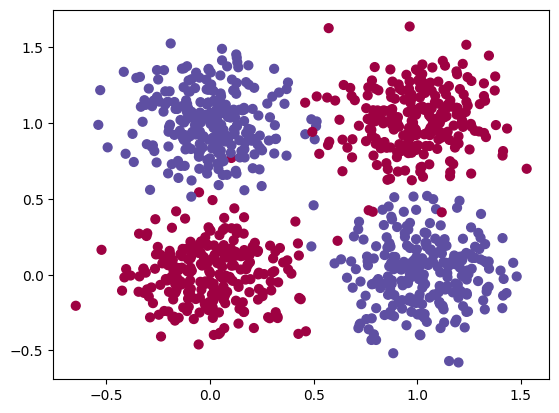

In [2]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [ ]:
import tensorflow as tf
from tensorflow import keras

my_model = keras.Sequential()
# Your code here!
# input layer thru Keras API
my_model.add(keras.Input(shape=X_train.shape[1:]))
# the hidden layer with 16 nodes tanh and softmax activation to match my custom implmentation below (tested this is best)
my_model.add(keras.layers.Dense(16, activation="tanh"))
# the output layer should be the softmax function to decide the class (there are only two classes (blue, red))
my_model.add(keras.layers.Dense(2, activation="softmax"))

# batch size is the number of samples processed before the model is updated
# epoch is the number of iterations to optimize with GD. Learning is iterative

In [ ]:
my_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                48        
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 82 (328.00 Byte)
Trainable params: 82 (328.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
my_model.compile(loss="sparse_categorical_crossentropy" ,
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = my_model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_val, y_val))

Epoch 1/100
23/23 [==============================] - 1s 13ms/step - loss: 0.7471 - accuracy: 0.6667 - val_loss: 0.6705 - val_accuracy: 0.7375
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7089 - accuracy: 0.7083 - val_loss: 0.6637 - val_accuracy: 0.7625
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.6958 - val_loss: 0.6644 - val_accuracy: 0.7500
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.6389 - val_loss: 0.6668 - val_accuracy: 0.7000
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.6194 - val_loss: 0.6690 - val_accuracy: 0.6625
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5569 - val_loss: 0.6700 - val_accuracy: 0.6500
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.5583 - val_loss: 0.6715 - val_accuracy: 0.6000
Epoch 8/100


In [ ]:
# how does the model perform on the test data
my_model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.9650


[0.38825249671936035, 0.9649999737739563]

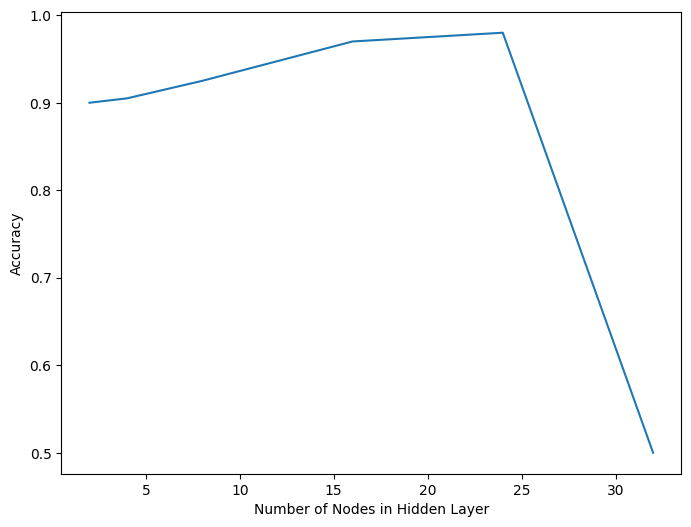

In [ ]:
import matplotlib.pyplot as plt

# Data
nodes = [2, 4, 8, 16, 24, 32]
accuracy = [0.90, 0.905, 0.925, 0.97, 0.98, 0.5]

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(nodes, accuracy, label='Accuracy')
plt.xlabel("Number of Nodes in Hidden Layer")
plt.ylabel("Accuracy")
plt.show()

There seems to be a sudden steep drop off, when going past 32 hidden layer nodes not sure why.

- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

def softmax(array):
  # np.exp takes each element in array and does e^x on it
  # dividing by the sum of the array of e^x in done on it to get custom softmax
  return np.exp(array) / np.sum(np.exp(array), axis=0)


class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """

        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        # creates arrays of size y*z of random numbers
        # w should be the size of (layer x layer-1)
        self.W1 = np.random.randn(n1, n0)
        # b should be (layer x m). The "x m" is just the beginning n1x1 vector replicated for efficiency
        self.b1 = np.random.randn(n1, 1)

        self.W2 = np.random.randn(n2, n1)
        self.b2 = np.random.randn(n2, 1)

        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse_output=False)

    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer
        # and softmax for the output layer

        # np.tile is turning the one b-vector and duplicating it to be the proper size for addition
        Z1 = self.W1.dot(X) + np.tile(self.b1, (1, self.W1.dot(X).shape[1]))
        # activation function using tanh
        A1 = np.tanh(Z1)

        Z2 = self.W2.dot(A1) + np.tile(self.b2,(1, self.W2.dot(A1).shape[1]))
        # activation function for output layer must be softmax (said we must implement our own on Piazza)
        A2 = softmax(Z2)
        return A1, A2


    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """


        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)
        # Another Hint: First, you may want to convert the label y into a one-hot vector
        Y = self.one_hot(y)
        # while there is only two classes we converted y to a one-hot vector so we are going to calc. cross-entropy for multi-class
        # the instructions also say return the average loss so we will need to divide it by the size of m (720)
        L = -Y[0].dot(np.log(A2[0])) - Y[1].dot(np.log(A2[1]))

        return L / Y.shape[1]

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """

        # You DO NOT CHANGE this function, ...
        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        m   = y.shape[0]
        dZ2 = A2 - self.one_hot(y)
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply( np.dot( self.W2.T, dZ2), 1-np.power( A1, 2))
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m

        return dW1, db1, dW2, db2


    def fit(self, X, y , epochs, X_val, Y_val):
        """
        Learns parameters for the neural network and returns the model.

        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):

            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            A1, A2 = self.forward_pass(X)

            # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1, A2, X, y)

            # Step 3: Gradient Descent
            self.W1 = self.W1 - self.alpha*dW1
            self.b1 = self.b1 - self.alpha*db1
            self.W2 = self.W2 - self.alpha*dW2
            self.b2 = self.b2 - self.alpha*db2

            # Print the loss and validation accuracy every 10 epochs.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f"
                      %(i,epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T

        # SUBTASK 5: Implement the prediction process.
        # Hint: It should include a forward pass, and then use the class with higher probability.
        A1, A2 = self.forward_pass(X)

        y_hat = np.zeros_like(A2[0])
        y_hat[A2[0] < A2[1]] = 1

        return y_hat


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        correct_y = (y_hat == y).astype(int)

        return sum(correct_y)/m


    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))
        return Y.T # Transpose to get into same shape 1 x m


    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version.

Epoch 0/100 - loss: 1.316071 - accuracy: 0.680556 - val_loss: 1.668294 - val_accuracy: 0.587500
Epoch 10/100 - loss: 1.208569 - accuracy: 0.637500 - val_loss: 1.499974 - val_accuracy: 0.550000
Epoch 20/100 - loss: 1.112409 - accuracy: 0.595833 - val_loss: 1.349849 - val_accuracy: 0.537500
Epoch 30/100 - loss: 1.023354 - accuracy: 0.554167 - val_loss: 1.213308 - val_accuracy: 0.487500
Epoch 40/100 - loss: 0.940941 - accuracy: 0.525000 - val_loss: 1.089851 - val_accuracy: 0.462500
Epoch 50/100 - loss: 0.865958 - accuracy: 0.516667 - val_loss: 0.980349 - val_accuracy: 0.475000
Epoch 60/100 - loss: 0.799134 - accuracy: 0.516667 - val_loss: 0.885425 - val_accuracy: 0.475000
Epoch 70/100 - loss: 0.740635 - accuracy: 0.519444 - val_loss: 0.804781 - val_accuracy: 0.475000
Epoch 80/100 - loss: 0.690064 - accuracy: 0.523611 - val_loss: 0.737239 - val_accuracy: 0.475000
Epoch 90/100 - loss: 0.646667 - accuracy: 0.533333 - val_loss: 0.681102 - val_accuracy: 0.487500
Accuracy on the test set is  0.

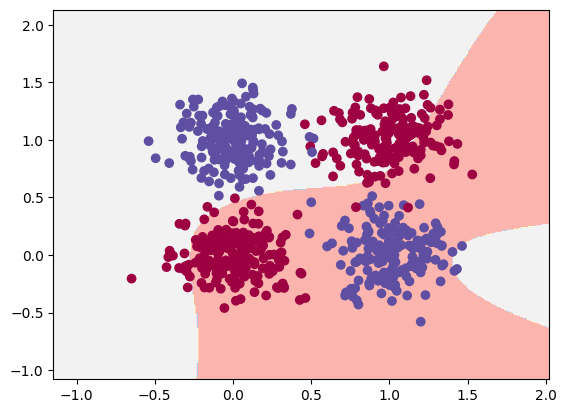

In [ ]:
# MODEL 1 here
n0 = 2 # input layer dimensionality
n1 = 16 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.01 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)


Epoch 0/200 - loss: 2.974161 - accuracy: 0.518056 - val_loss: 3.707979 - val_accuracy: 0.475000
Epoch 10/200 - loss: 1.764087 - accuracy: 0.477778 - val_loss: 2.043398 - val_accuracy: 0.462500
Epoch 20/200 - loss: 0.896837 - accuracy: 0.497222 - val_loss: 0.933438 - val_accuracy: 0.487500
Epoch 30/200 - loss: 0.502944 - accuracy: 0.673611 - val_loss: 0.496514 - val_accuracy: 0.675000
Epoch 40/200 - loss: 0.358354 - accuracy: 0.870833 - val_loss: 0.344589 - val_accuracy: 0.862500
Epoch 50/200 - loss: 0.298813 - accuracy: 0.906944 - val_loss: 0.283276 - val_accuracy: 0.912500
Epoch 60/200 - loss: 0.268453 - accuracy: 0.920833 - val_loss: 0.253231 - val_accuracy: 0.937500
Epoch 70/200 - loss: 0.248679 - accuracy: 0.931944 - val_loss: 0.234717 - val_accuracy: 0.962500
Epoch 80/200 - loss: 0.233485 - accuracy: 0.945833 - val_loss: 0.221063 - val_accuracy: 0.962500
Epoch 90/200 - loss: 0.220815 - accuracy: 0.951389 - val_loss: 0.209911 - val_accuracy: 0.962500
Epoch 100/200 - loss: 0.209851 

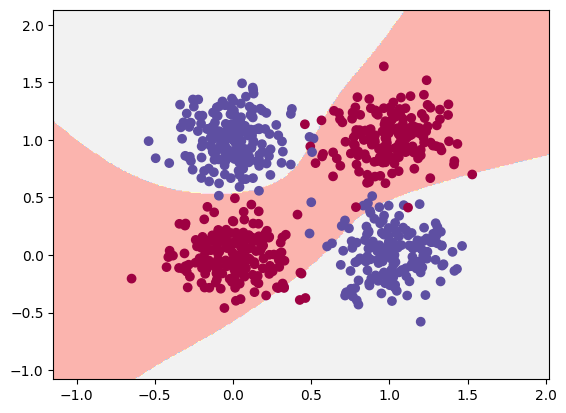

In [ ]:
# MODEL 2 here
n0 = 2 # input layer dimensionality
n1 = 100 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.02 # learning rate for gradient descent
epochs = 200 # number of iteration/epochs

# Build a model with 3 layers
myModel2 = MyNeuralNet(n0, n1, n2, alpha);
myModel2.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel2.evaluate(X_test, y_test))

# Plot the decision boundary
myModel2.plot_decision_boundary(X_train, y_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras

my_model2 = keras.Sequential()
# Your code here!
# input layer thru Keras API
my_model2.add(keras.Input(shape=X_train.shape[1:]))
# the hidden layer with 16 nodes tanh and softmax activation to match my custom implmentation below (tested this is best)
my_model2.add(keras.layers.Dense(100, activation="tanh"))
# the output layer should be the softmax function to decide the class (there are only two classes (blue, red))
my_model2.add(keras.layers.Dense(2, activation="softmax"))

my_model2.compile(loss="sparse_categorical_crossentropy" ,
              optimizer="sgd",
              metrics=["accuracy"])

history = my_model2.fit(X_train, y_train, epochs=200,
                    validation_data=(X_val, y_val))

# how does the model perform on the test data
my_model2.evaluate(X_test, y_test)

Epoch 1/200
23/23 [==============================] - 1s 20ms/step - loss: 0.7086 - accuracy: 0.3417 - val_loss: 0.7246 - val_accuracy: 0.2625
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.3139 - val_loss: 0.7113 - val_accuracy: 0.2750
Epoch 3/200
23/23 [==============================] - 0s 6ms/step - loss: 0.6966 - accuracy: 0.3653 - val_loss: 0.7046 - val_accuracy: 0.4125
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.4306 - val_loss: 0.6998 - val_accuracy: 0.4500
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4819 - val_loss: 0.6979 - val_accuracy: 0.4625
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.4972 - val_loss: 0.6974 - val_accuracy: 0.4750
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5083 - val_loss: 0.6986 - val_accuracy: 0.4750
Epoch 8/200


[0.5328720211982727, 0.925000011920929]

Epoch 0/100 - loss: 13.754259 - accuracy: 0.513889 - val_loss: 16.686217 - val_accuracy: 0.412500
Epoch 10/100 - loss: 31.874917 - accuracy: 0.513889 - val_loss: 39.191207 - val_accuracy: 0.412500
Epoch 20/100 - loss: 3.356685 - accuracy: 0.643056 - val_loss: 3.228093 - val_accuracy: 0.675000
Epoch 30/100 - loss: 0.208424 - accuracy: 0.976389 - val_loss: 0.150520 - val_accuracy: 0.962500
Epoch 40/100 - loss: 0.061012 - accuracy: 0.986111 - val_loss: 0.058592 - val_accuracy: 0.987500
Epoch 50/100 - loss: 0.039908 - accuracy: 0.987500 - val_loss: 0.059410 - val_accuracy: 0.987500
Epoch 60/100 - loss: 0.032141 - accuracy: 0.987500 - val_loss: 0.059851 - val_accuracy: 0.987500
Epoch 70/100 - loss: 0.027774 - accuracy: 0.988889 - val_loss: 0.059197 - val_accuracy: 0.987500
Epoch 80/100 - loss: 0.024983 - accuracy: 0.988889 - val_loss: 0.059172 - val_accuracy: 0.987500
Epoch 90/100 - loss: 0.023064 - accuracy: 0.991667 - val_loss: 0.060310 - val_accuracy: 0.987500
Accuracy on the test set is

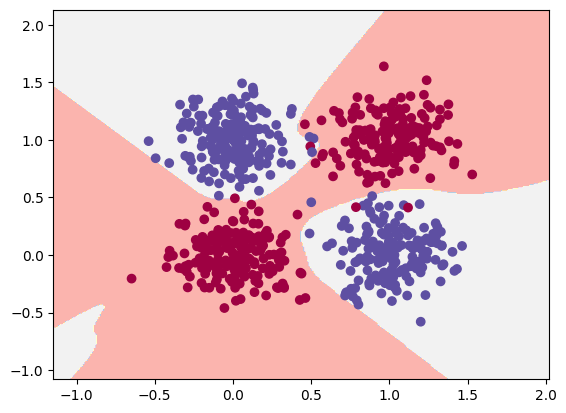

In [ ]:
# MODEL 3 here
n0 = 2 # input layer dimensionality
n1 = 20 # hidden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 5 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel3 = MyNeuralNet(n0, n1, n2, alpha);
myModel3.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel3.evaluate(X_test, y_test))

# Plot the decision boundary
myModel3.plot_decision_boundary(X_train, y_train)

Library Model Test Accuracy (n0=2, n1=16, n2=2, epoch=100): 0.965

Custom Model Test Accuracy  (n0=2, n1=16, n2=2, epoch=100): 0.495

Library Model Test Accuracy (n0=2, n1=100, n2=2, epoch=200): 0.925

Custom Model Test Accuracy  (n0=2, n1=100, n2=2, epoch=200): 0.965

Custom Model Test Accuracy  (n0=2, n1=20, n2=2, alpha=5, epoch=100): 0.975

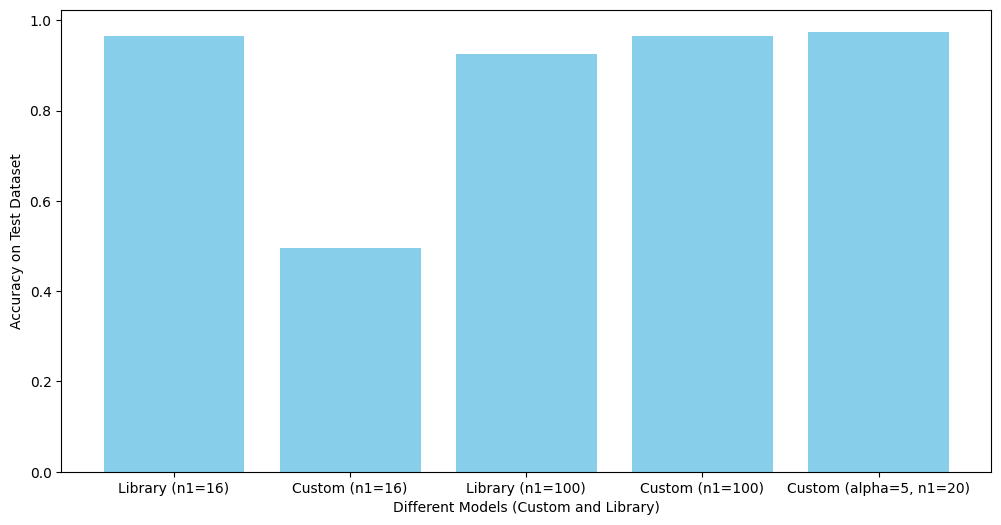

In [ ]:
# COMPARISONS WITH THE STANDARD LIBRARY
import matplotlib.pyplot as plt

# Data
x = ['Library (n1=16)', 'Custom (n1=16)', 'Library (n1=100)', 'Custom (n1=100)', 'Custom (alpha=5, n1=20)']
y = [0.965, 0.495, 0.925, 0.965, 0.975]

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel('Different Models (Custom and Library)')
plt.ylabel('Accuracy on Test Dataset')
plt.show()

## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

My own network performed quite well after performing tuning. When I began the first task of implementing the 3 layered library implementation of the artificial neural network, I wanted to use tanh as the hidden layer activation function and softmax as the output activation function in order to have more consistency between models.

When implementing the library ANN I found that 16 or 24 nodes in the hidden layer performed very well; however anything higher (as seen in the graph 32), the accuracy score for the same number of epochs fell very quickly.

There were a few major differences between my custom implementation and the library. Firstly as you can see in the bar-graph that for the library implementation and the custom implementation that use 16 hidden layer nodes and 100 epochs the accuracy is quite different. Library - 0.965 vs Custom - 0.495. At first this was concerning to me, so I tried to build other models and tune their parameters to see what was wrong with my custom implementation. When doing so I found that my custom model tends to work better than the library function when I increase the learning rate (alpha) and the number of hidden layer nodes (n1).

As seen in the above bar graph, when (n1=100, epochs=200) my custom model's accuracy was 0.965 while the library's model scored 0.925. This relaxed my fears that something was wrong with the model, and re-assured me that my model performed well but some piece of the library's internal function is probably implemented differently than my custom ANN that is rather tailored to a 3-layer ANN.

Lastly, I found that the best overall accuracy score came from my custom implementation when I lowered my number of hidden nodes (n1) down to the 16-24 range I found to be optimal at the beginning of this assignment, and when I raised alpha and the number of epochs. Ultimately, I found that raising alpha significantly (alpha=5) allowed me to keep the number of epochs the same at (epochs=100) as the accuracy did not keep improving even with more iterations.

Overall this was a good assignment and I feel I have a much better understanding of what goes on behind the scenes in an ANN and it is not just as simple as writing 3 lines of code. The portion of the assignment which I learned the most from was implementing loss and forward pass functions. Inside of forward pass, I had to really think about the shape of z1, a1, z2, and a2, and I gained a much better understanding of the theory we discussed in class. The most challenging portion of this assignment for me was the loss function. This is where I had to think a while, and print the outputs of A2 and Y_onehot. Here it became clear to me the onehot function was splitting it up into arrays for both classes, and despite this being a binary classification problem it made more sense for us to use the multiclass classification with one-hot labels we discussed in class. When I was looking at the output for A2 I was at first very confused as I was only looking at it for the first iteration, and then I realized that I should proceed with the rest and implement the fit function before debugging more as the first iteration is dealing with completely random weight and bias vectors and making sense of that data may not be the best idea.

Once gaining this understanding proceeding through the rest of the assignment was very easy, but made me understand much more about ANNs, and seeing how my custom models performed visually via the plot_decision_boundary() aid was very cool to see.

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 13](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe)
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 4:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!